# **Bài 1**

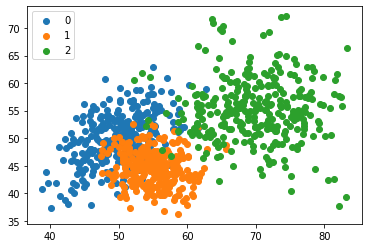

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv("https://raw.githubusercontent.com/dinhvietcuong1996/Lab-MachineLearningCourse/master/Lab06/bt_train.csv")

x1_train = train['x1'].values
x2_train = train['x2'].values
y_train = train['label'].values

plt.scatter(x1_train[y_train == 0], x2_train[y_train==0], label = 0)
plt.scatter(x1_train[y_train == 1], x2_train[y_train==1], label = 1)
plt.scatter(x1_train[y_train == 2], x2_train[y_train==2], label = 2)
plt.legend()

In [77]:
train.head()

,x1,x2,label
0,52.386275,52.547076,0
1,47.574456,51.901584,0
2,51.193423,50.301122,0
3,49.079278,43.499640,0
4,50.225133,53.462917,0


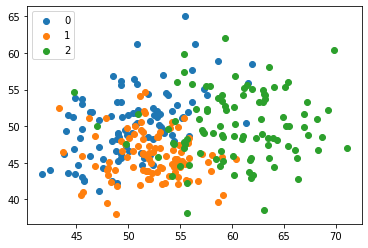

In [78]:
plt.figure()
valid = pd.read_csv("https://raw.githubusercontent.com/dinhvietcuong1996/Lab-MachineLearningCourse/master/Lab06/bt_valid.csv")
x1_valid = valid['x1'].values
x2_valid = valid['x2'].values
y_valid = valid['label'].values
plt.scatter(x1_valid[y_valid == 0], x2_valid[y_valid==0], label = 0)
plt.scatter(x1_valid[y_valid == 1], x2_valid[y_valid==1], label = 1)
plt.scatter(x1_valid[y_valid == 2], x2_valid[y_valid==2], label = 2)
plt.legend()

In [79]:
x1_mean = np.mean(x1_train)
x1_std = np.std(x1_train)
x2_mean = np.mean(x2_train)
x2_std = np.std(x2_train)

x1_train = (x1_train - x1_mean)/ x1_std
x2_train = (x2_train - x2_mean)/ x2_std

x1_valid = (x1_valid - x1_mean)/ x1_std
x2_valid = (x2_valid - x2_mean)/ x2_std

**Dùng Logistic Regression**

In [80]:
from sklearn.linear_model import LogisticRegression

X_train = np.concatenate([x1_train.reshape(-1,1), x2_train.reshape(-1,1)], axis=-1)
X_valid = np.concatenate([x1_valid.reshape(-1,1), x2_valid.reshape(-1,1)], axis=-1)

lr = LogisticRegression().fit(X_train, y_train)
print("Sklearn accuracy on train: ", np.mean(y_train == lr.predict(X_train)))
print("Sklearn accuracy on valid: ", np.mean(y_valid == lr.predict(X_valid)))

Sklearn accuracy on train:  0.8855555555555555
Sklearn accuracy on valid:  0.6433333333333333


**Dùng Decision Tree**

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

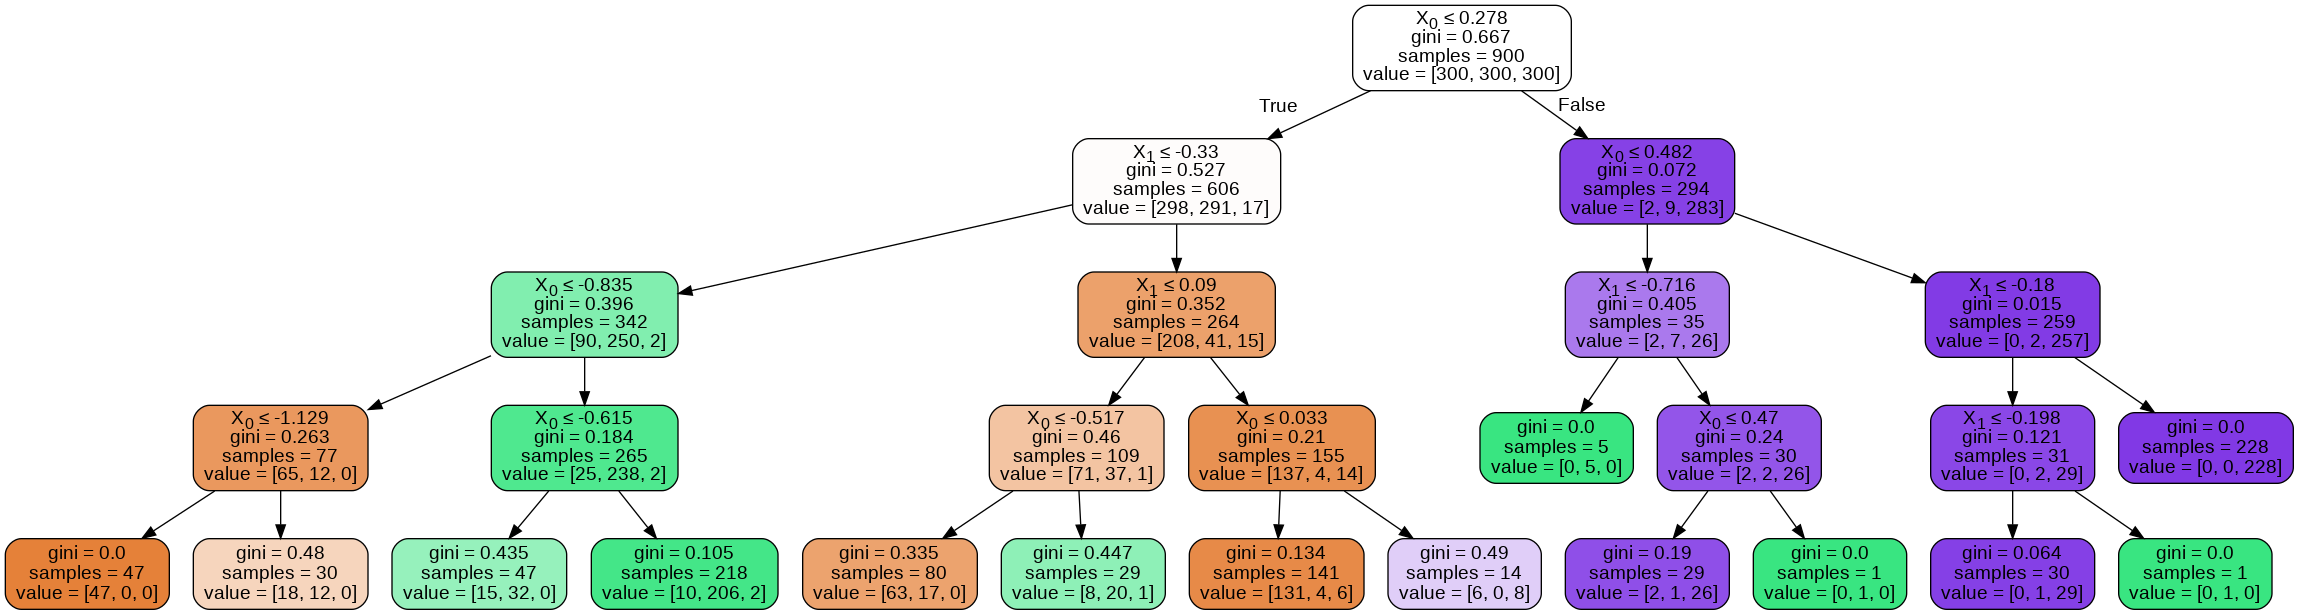

In [82]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [83]:
y_pred = dtree.predict(X_valid)
print("Decision Tree accuracy on valid: ", np.mean(y_valid == y_pred))

Decision Tree accuracy on valid:  0.65


**Dùng Random Forest**

In [84]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
y_pred_RF = clf.predict(X_valid)
print("Random Forest accuracy on valid: ", np.mean(y_valid == y_pred_RF))

Random Forest accuracy on valid:  0.66


# **Bài 2**

In [86]:
def entropy(arr_label, y):
  label = np.unique(y)
  arr = [0]*len(label)
  for i in range(len(arr_label)):
    arr[arr_label[i]]+=1
  H = 0
  for i in arr:
    if(i != 0):
      H += -(i/len(arr_label))*np.log2(i/len(arr_label))
  return H

In [87]:
def get_subarray(arr, thres):
  index = 0
  for i in range(len(arr)):
    if(arr[i] < thres):
      index = i
  return index

In [88]:
def best_information_gain(arr, label): #arr: attribute, label: y_valid or y_train
  arr_thres = []
  for i in range(len(arr) - 1):
    arr_thres.append((arr[i]+arr[i+1])/2) #get all threshold in array
  max_gain = -1000000
  max_gain_ratio = -1000000
  index_max = 0
  for j in arr_thres:
    index = get_subarray(arr, j)
    arr_label_1 = label[:index+1]
    arr_label_2 = label[index+1:]
    H1 = entropy(arr_label_1, label)
    H2 = entropy(arr_label_2, label)
    H = entropy(label, label)
    gain = H - (len(arr_label_1)/len(arr))*H1 - (len(arr_label_2)/len(arr))*H2 #calculate gain
    gain_ratio = gain/H #calculate gain ratio
    if(gain > max_gain):
      max_gain = gain
      index_max = index
    if(gain_ratio > max_gain_ratio):
      max_gain_ratio = gain_ratio
  return gain, index_max, max_gain_ratio

In [89]:
def find_best_feature(feature1, feature2, label):
  feature = ""
  index = None
  label_sorted = []

  x1_index = feature1.argsort()
  x1 = feature1[x1_index] #sort feature1 theo thứ tự tăng dần
  label_1 = label[x1_index] #sort label tương ứng theo thứ tự tăng dần của feature1
  gain_1, index_1, gain_ratio_1 = best_information_gain(x1, label_1)

  x2_index = feature2.argsort()
  x2 = feature2[x2_index]
  label_2 = label[x2_index]
  gain_2, index_2, gain_ratio_2 = best_information_gain(x2, label_2)

  if (gain_ratio_1 > gain_ratio_2):
    feature = "feature1"
    index = index_1
    label_sorted = label_1
  else:
    feature = "feature2"
    index = index_2
    label_sorted = label_1
  return feature, index, label_sorted

In [90]:
x1_index = x1_train.argsort()
x1 = x1_train[x1_index]
x2_index = x2_train.argsort()
x2 = x2_train[x2_index]

**Lần tách đầu tiên**

In [91]:
feature_first, index_first, label = find_best_feature(x1_train, x2_train, y_train)
print("The best feature is: ", feature_first)
print("index: ", index_first)

The best feature is:  feature1
index:  605


Ta chọn $x1$ là best feature ở lần tách đầu tiên

In [92]:
import statistics 
print("Threshold: ", x1[index_first])
print("Label with the most frequent: ", statistics.mode(label[index_first:])) #từ vị trí index_first về sau

Threshold:  0.2741128491279944
Label with the most frequent:  2


**Lần tách thứ 2**

In [93]:
x_1_second = x1[:index_first] #từ vị trí đầu tiên đến vị trí index_first-1
x_2_second = x2[:index_first] 
label_second = y_train[:index_first]
feature_second, index_second, label = find_best_feature(x_1_second, x_2_second, label_second) #label: được sort tương ứng theo thứ tự tăng dần của x2
print("The best feature is: ", feature_second)
print("index: ", index_second)

The best feature is:  feature2
index:  299


Ta chọn $x2$ là best feature ở lần tách thứ 2

In [94]:
print("Threshold: ", x2[index_second])
print("Label with the most frequent: ", statistics.mode(label[index_second:]))

Threshold:  -0.5264962658814374
Label with the most frequent:  1


In [95]:
class Node:
    """Ta giả sử các feature đều ở dạng số thực
    node sẽ lưu index của feature và một giá trị ngưỡng split_value
    đồng thời cũng lưu node con hoặc là class đoán
    khi predict tại node
    giá trị của feature được đem so sánh với ngưỡng, tùy vào kết quả lớn hay nhỏ
    mà trả về một node hoặc một class khác nhau
    """
    def __init__(self,):
        
        self.feature_index = 0       ## lưu cột feature số mấy
        self.split_value = 0.0       ## lưu ngưỡng
        
        self.left_node = 0
        self.right_node = 0
        ## left_node và right_node là một node, hoặc là một class (kiểu biến nào cũng đc) biểu thị dự đoán
        
    def predict(self, sample):
        ## nhận một feature vector
        ## trả về một node con, hoặc một class
        if sample[self.feature_index] < self.split_value:
            return self.left_node
        return self.right_node
        
class DecisionTree:
    
    def __init__(self,):
        self.root = Node()
        
    def __predict_at_node__(self, sample, node):
        ## sample là một vector feature
        if type(node) is not Node:
            return node
        return self.__predict_at_node__(sample, node.predict(sample))
        
    def predict(self, X):
        ## X là một ma trận, mỗi dòng là một sample
        return np.asarray([self.__predict_at_node__(sample, self.root) for sample in X])

In [96]:
tree = DecisionTree()
tree.root = Node()

# Giá trị tại attribut1 lớn hơn 0.2741128491279944 thì thuộc label 2
tree.root.feature_index = 0
tree.root.split_value = x1[index_first]
tree.root.left_node = Node()    
tree.root.right_node = 2 

# Giá trị tại attribut1 nhỏ hơn 0.2741128491279944: 
tree.root.left_node.feature_index = 1
tree.root.left_node.split_value = x2[index_second]
tree.root.left_node.left_node = 1   
tree.root.left_node.right_node = 0  

print("Accuracy on valid: ", np.mean(tree.predict(X_valid) == y_valid))

Accuracy on valid:  0.61


**Decision Tree của Sklearn**

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
y_pred = dtree.predict(X_valid)
print("Decision Tree accuracy on valid: ", np.mean(y_valid == y_pred))

Decision Tree accuracy on valid:  0.6266666666666667
